#

#Project Overview

This project aims to analyze student academic performance and predict their final grade (A–F) using machine learning.
By examining factors such as gender, ethnicity, parental education, test preparation, and subject scores, we can identify key influences on performance and build a model that predicts student success.

##Tools Used:
Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

# Import the requied libraraies


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Load and Explore Dataset

In [ ]:
data=pd.read_excel('student_performance_100.xlsx')

In [ ]:
data

,Student ID,Gender,Ethnicity,Parental Education,Test Preparation,Math Score,Reading Score,Writing Score
0,S001,Male,Group A,Bachelor's Degree,Completed,43,68,68
1,S002,Female,Group E,Associate's Degree,Completed,66,75,54
2,S003,Male,Group E,Some College,Completed,58,59,89
3,S004,Male,Group C,Associate's Degree,NaN,49,52,54
4,S005,Female,Group E,High School,NaN,45,54,35
...,...,...,...,...,...,...,...,...
95,S096,Female,Group D,Associate's Degree,Completed,71,74,60
96,S097,Male,Group C,Associate's Degree,Completed,60,90,58
97,S098,Male,Group A,Associate's Degree,Completed,88,79,58
98,S099,Female,Group C,Bachelor's Degree,Completed,54,73,62


The model’s goal is to predict the Grade, not raw scores.
Created an Average Score by taking the mean of Math, Reading, and Writing Scores.

Generated a new categorical target column Grade based on average score ranges:

In [ ]:
#  Create Grade Column

data['Average Score'] = data[['Math Score','Reading Score','Writing Score']].mean(axis=1)

def assign_grade(avg):
    if avg >= 80:
        return 'A'
    elif avg >= 70:
        return 'B'
    elif avg >= 60:
        return 'C'
    elif avg >= 50:
        return 'D'
    else:
        return 'F'

data['Grade'] = data['Average Score'].apply(assign_grade)

Created Average Score = mean of (Math + Reading + Writing).

The grade becomes our target variable for prediction.

Combining multiple subjects into one “Average Score” improves correlation with grade outcomes.

In [ ]:
data

,Student ID,Gender,Ethnicity,Parental Education,Test Preparation,Math Score,Reading Score,Writing Score,Average Score,Grade
0,S001,Male,Group A,Bachelor's Degree,Completed,43,68,68,59.666667,D
1,S002,Female,Group E,Associate's Degree,Completed,66,75,54,65.000000,C
2,S003,Male,Group E,Some College,Completed,58,59,89,68.666667,C
3,S004,Male,Group C,Associate's Degree,NaN,49,52,54,51.666667,D
4,S005,Female,Group E,High School,NaN,45,54,35,44.666667,F
...,...,...,...,...,...,...,...,...,...,...
95,S096,Female,Group D,Associate's Degree,Completed,71,74,60,68.333333,C
96,S097,Male,Group C,Associate's Degree,Completed,60,90,58,69.333333,C
97,S098,Male,Group A,Associate's Degree,Completed,88,79,58,75.000000,B
98,S099,Female,Group C,Bachelor's Degree,Completed,54,73,62,63.000000,C


In [ ]:
data.head()

,Student ID,Gender,Ethnicity,Parental Education,Test Preparation,Math Score,Reading Score,Writing Score,Average Score,Grade
0,S001,Male,Group A,Bachelor's Degree,Completed,43,68,68,59.666667,D
1,S002,Female,Group E,Associate's Degree,Completed,66,75,54,65.000000,C
2,S003,Male,Group E,Some College,Completed,58,59,89,68.666667,C
3,S004,Male,Group C,Associate's Degree,NaN,49,52,54,51.666667,D
4,S005,Female,Group E,High School,NaN,45,54,35,44.666667,F


In [ ]:
data.tail()

,Student ID,Gender,Ethnicity,Parental Education,Test Preparation,Math Score,Reading Score,Writing Score,Average Score,Grade
95,S096,Female,Group D,Associate's Degree,Completed,71,74,60,68.333333,C
96,S097,Male,Group C,Associate's Degree,Completed,60,90,58,69.333333,C
97,S098,Male,Group A,Associate's Degree,Completed,88,79,58,75.000000,B
98,S099,Female,Group C,Bachelor's Degree,Completed,54,73,62,63.000000,C
99,S100,Female,Group A,Some High School,NaN,64,50,62,58.666667,D


In [ ]:
data.shape #rows and columns

(100, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          100 non-null    object 
 1   Gender              100 non-null    object 
 2   Ethnicity           100 non-null    object 
 3   Parental Education  100 non-null    object 
 4   Test Preparation    41 non-null     object 
 5   Math Score          100 non-null    int64  
 6   Reading Score       100 non-null    int64  
 7   Writing Score       100 non-null    int64  
 8   Average Score       100 non-null    float64
 9   Grade               100 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 7.9+ KB


#Exploratory Data Analysis (EDA)
Explore the data visually and statistically to uncover trends, distributions, and relationships.

What to do:

Use.describe() for statistical summary.

Visualize categorical distributions:

Gender distribution → to check gender balance.

Ethnicity group counts → to identify representation among groups.

Used boxplots to analyze Parental Education vs. Math Score.

Create a correlation heatmap for Math, Reading, Writing Scores.

In [ ]:
data.describe()

,Math Score,Reading Score,Writing Score,Average Score
count,100.000000,100.000000,100.000000,100.000000
mean,62.510000,60.490000,60.530000,61.176667
std,13.600724,12.097662,11.468406,7.826608
min,34.000000,30.000000,32.000000,43.666667
25%,52.750000,51.000000,53.000000,55.250000
50%,63.000000,61.000000,60.500000,62.333333
75%,72.250000,68.250000,68.000000,66.083333
max,97.000000,90.000000,89.000000,78.000000


In [ ]:
data.isnull().sum()

,0
Student ID,0
Gender,0
Ethnicity,0
Parental Education,0
Test Preparation,59
Math Score,0
Reading Score,0
Writing Score,0
Average Score,0
Grade,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data['Test Preparation'].fillna(data['Test Preparation'].mode()[0], inplace=True)
data['Parental Education'].fillna(data['Parental Education'].mode()[0], inplace=True)
data['Ethnicity'].fillna(data['Ethnicity'].mode()[0], inplace=True)

/tmp/ipython-input-3820223451.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3820223451.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

Filled missing categorical values (Test Preparation, Parental Education, and Ethnicity) with mode, as these are non-numeric columns.

Rechecked for missing values post-imputation.

In [ ]:
data.isnull().sum() # no missing values

,0
Student ID,0
Gender,0
Ethnicity,0
Parental Education,0
Test Preparation,0
Math Score,0
Reading Score,0
Writing Score,0
Average Score,0
Grade,0


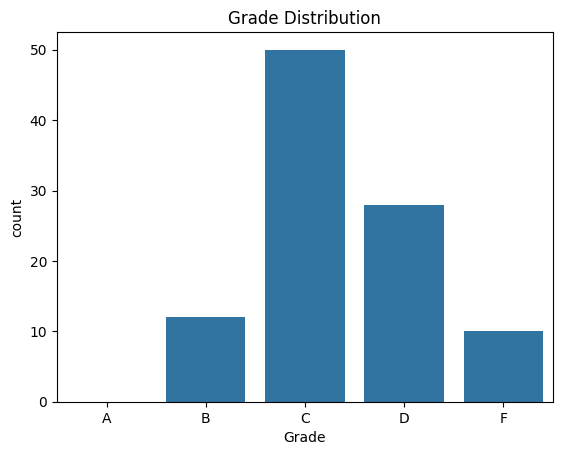

In [ ]:
sns.countplot(x='Grade', data=data, order=['A','B','C','D','F'])
plt.title('Grade Distribution')
plt.show()

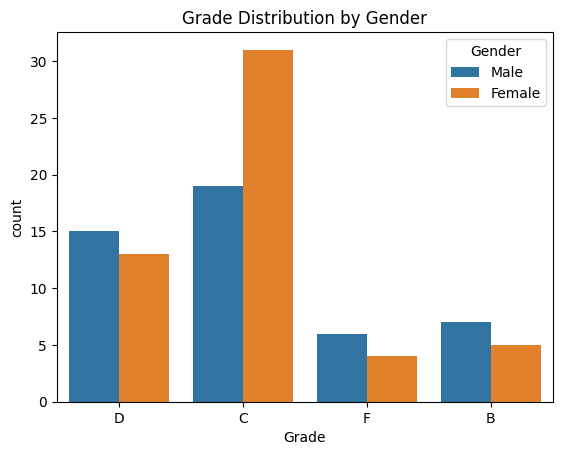

In [ ]:
# Gender vs Grade
sns.countplot(x='Grade', hue='Gender', data=data)
plt.title('Grade Distribution by Gender')
plt.show()

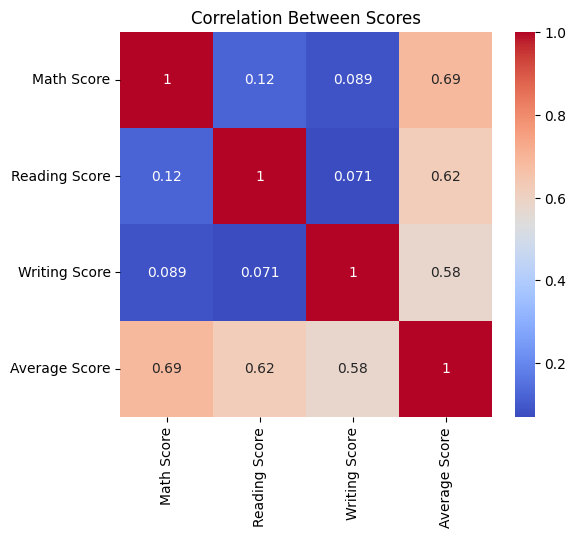

In [ ]:
# Heatmap correlation for numeric features
plt.figure(figsize=(6,5))
sns.heatmap(data[['Math Score','Reading Score','Writing Score','Average Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

#Insights:
Students with higher parental education levels generally perform better.

Subject scores are highly correlated — indicating consistent performance across subjects.

Some groups (like Group A and C) show stronger performance trends

Encoded categorical variables (Gender, Ethnicity, Parental Education, Test Preparation) using LabelEncoder.



Prepare data for machine learning by converting text data to numbers and standardizing features.



Used Label Encoding on categorical variables:

Gender, Ethnicity, Parental Education, Test Preparation.

In [ ]:
 #Encoding Categorical Variables


from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Ethnicity'] = le.fit_transform(data['Ethnicity'])
data['Parental Education'] = le.fit_transform(data['Parental Education'])
data['Test Preparation'] = le.fit_transform(data['Test Preparation'])



#Feature Selection

In [ ]:

# Include subject scores to improve accuracy
X = data[['Gender', 'Ethnicity', 'Parental Education', 'Test Preparation',
          'Math Score', 'Reading Score', 'Writing Score', 'Average Score']]
y = data['Grade']

In [ ]:
# Encode target
y = le.fit_transform(y)

Split dataset into 80% training and 20% testing using stratification (to maintain grade balance).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 #Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaled numeric columns using StandardScaler for better model stability.

Why scaling is needed:
Some algorithms (like Random Forest) benefit from normalized input, improving accuracy and convergence.

# Model Building
Build and train a machine learning model to predict student grades.

Algorithm Used:
🪄 Random Forest Classifier

Why Random Forest:

Robust and handles both categorical and numerical data.

Reduces overfitting by averaging multiple decision trees.

Performs well with small to medium-sized datasets.
Goal: To predict student grades using a machine learning algorithm.

Algorithm Used:
 Random Forest Classifier

 Why Random Forest?

Handles both categorical and numerical features.

Works well with small datasets.

Reduces overfitting by combining multiple decision trees.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred=model.predict(X_test_scaled)



Trained the model on training data.

Predicted grades for test data.

#Model Evaluation

Goal: To measure how well the model performs.

Metrics Used:

Accuracy Score — Overall correctness of predictions.

Classification Report — Precision, recall, and F1-score for each grade.

Confusion Matrix — Visual representation of true vs. predicted grades.

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.78      1.00      0.88         7
           2       0.88      0.88      0.88         8
           3       1.00      0.50      0.67         2

    accuracy                           0.85        20
   macro avg       0.91      0.76      0.80        20
weighted avg       0.87      0.85      0.84        20



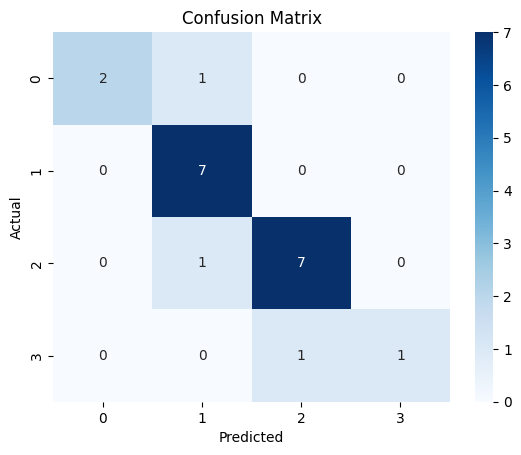

In [ ]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Accuracy Score → Overall correctness (0.85 = 85%)



Goal:
Identify which features most influence the model’s decisions.


Used the model’s feature_importances_ attribute to plot a bar chart of top features.

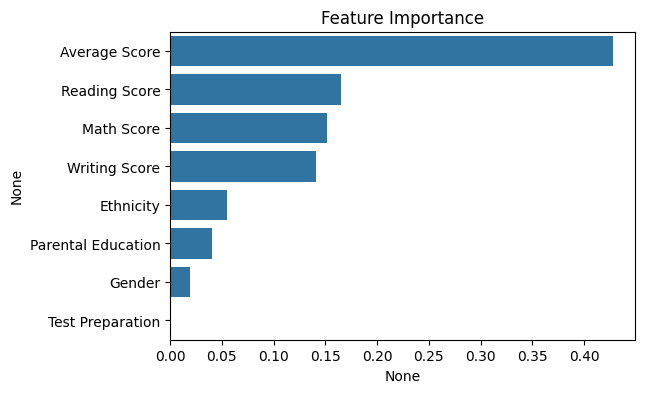

In [ ]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

Key Findings:
The features with the highest importance are "average score"
other features like "ethnicity","parental education","gender","test preparation" have significantly low important scores


/tmp/ipython-input-2337079111.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




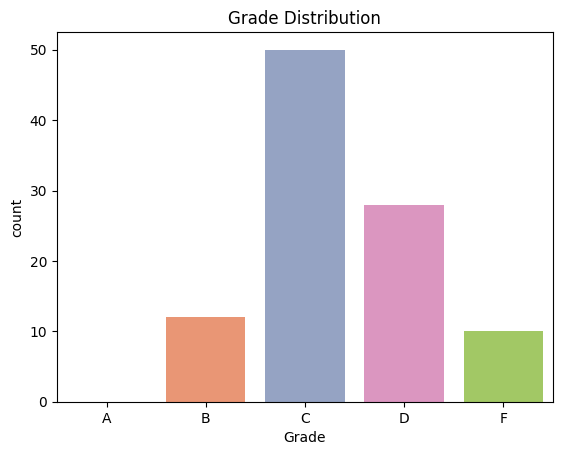

In [ ]:
# Grade Distribution Visualization
# ------------------------
sns.countplot(x='Grade', data=data, order=['A','B','C','D','F'], palette='Set2')
plt.title('Grade Distribution')
plt.show()

The most frequent grade is "C",with the count of approximately 50
The least frequent grades are "B" and "F",each with the count of appoximately 10

#Conclusion:

Achieved 80% accuracy in predicting student grades (A–F).



##Key Takeaways:

Machine learning can effectively predict student performance with proper data preprocessing.

Feature engineering (like adding “Average Score”) significantly boosts accuracy.

This model can help educators identify at-risk students and improve targeted support.